# Fundamentos de Aprendizado de Máquina

## Objetivos
Exercitar os seguintes conceitos trabalhados no Módulo:
- Análise exploratória dos dados (EDA - Exploratory Data Analysis).
- Preparação dos dados.
- Comparação e ajuste de modelos de classificação.

## Enunciado
Neste desafio, serão abordados todos os conceitos apresentados durante o módulo
Fundamentos de Aprendizado de Máquina. Utilizaremos uma versão modificada do dataset
“Wine Quality” disponível no UCI Machine Learning Repository
(https://archive.ics.uci.edu/ml/datasets/wine). Esse dataset contém um conjunto de
atributos (dados de sensores) sobre o processo de fabricação de vinhos (tinto e branco).
Esses dados são utilizados para classificar, ao final do processo, a qualidade do vinho
obtido. Existem informações como o teor alcoólico e nível de acidez. Para este desafio, é
necessário baixar o arquivo “winequality-red.data” presente no seguinte link:
https://drive.google.com/file/d/13jSMzdwO3nZDr-n62--fO4jrE-oIG8cX/view?usp=sharing

# Dataset: Winequality

O objetivo deste notebook é classificar a qualidade do vinho obtido (tinto e branco)

In [ ]:
import pandas as pd

In [ ]:
df_winequality = pd.read_csv('/content/winequality-red.csv', sep=';')

## Conhecendo o dataset

In [ ]:
# Tabela com as 5 primeiras linhas
df_winequality.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
# Tabela com as 5 últimas linhas
df_winequality.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


In [ ]:
# Informações sobre o dataset
df_winequality.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


Não temos nenhum dado nulo no nosso dataset

In [ ]:
df_winequality.shape

(1599, 12)

## Análise Exploratória dos dados

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
df_winequality.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [ ]:
print("Valor máximo de qualidade do vinho: {}\nValor mínimo de qualidade do vinho: {}".format(df_winequality['quality'].max(),
                                                                                              df_winequality['quality'].min()))

Valor máximo de qualidade do vinho: 8
Valor mínimo de qualidade do vinho: 3


In [ ]:
# Contando os valores de qualidade
df_winequality['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

Temos por exemplo, 681 instâncias com qualidade 5

In [ ]:
# Matriz de correlação dos dados
import seaborn as sns
import numpy as np

In [ ]:
# Coeficiente de correlação de Pearson
df_winequality.corr(method='pearson').style.format("{:.2}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)  # Verifica a correlação entre os dados


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.0,-0.26,0.67,0.11,0.094,-0.15,-0.11,0.67,-0.68,0.18,-0.062,0.12
volatile acidity,-0.26,1.0,-0.55,0.0019,0.061,-0.011,0.076,0.022,0.23,-0.26,-0.2,-0.39
citric acid,0.67,-0.55,1.0,0.14,0.2,-0.061,0.036,0.36,-0.54,0.31,0.11,0.23
residual sugar,0.11,0.0019,0.14,1.0,0.056,0.19,0.2,0.36,-0.086,0.0055,0.042,0.014
chlorides,0.094,0.061,0.2,0.056,1.0,0.0056,0.047,0.2,-0.27,0.37,-0.22,-0.13
free sulfur dioxide,-0.15,-0.011,-0.061,0.19,0.0056,1.0,0.67,-0.022,0.07,0.052,-0.069,-0.051
total sulfur dioxide,-0.11,0.076,0.036,0.2,0.047,0.67,1.0,0.071,-0.066,0.043,-0.21,-0.19
density,0.67,0.022,0.36,0.36,0.2,-0.022,0.071,1.0,-0.34,0.15,-0.5,-0.17
pH,-0.68,0.23,-0.54,-0.086,-0.27,0.07,-0.066,-0.34,1.0,-0.2,0.21,-0.058
sulphates,0.18,-0.26,0.31,0.0055,0.37,0.052,0.043,0.15,-0.2,1.0,0.094,0.25


## Modelos de Machine Learning

### KNN (K Vizinhos mais Próximos)

In [ ]:
from sklearn import neighbors

In [ ]:
# Transforma os dados em array
X = df_winequality.iloc[:, :-1].values  # Dados de entrada
y = df_winequality.iloc[:, 11].values  # Saídas ou target

In [ ]:
X

array([[ 7.4  ,  0.7  ,  0.   , ...,  3.51 ,  0.56 ,  9.4  ],
       [ 7.8  ,  0.88 ,  0.   , ...,  3.2  ,  0.68 ,  9.8  ],
       [ 7.8  ,  0.76 ,  0.04 , ...,  3.26 ,  0.65 ,  9.8  ],
       ...,
       [ 6.3  ,  0.51 ,  0.13 , ...,  3.42 ,  0.75 , 11.   ],
       [ 5.9  ,  0.645,  0.12 , ...,  3.57 ,  0.71 , 10.2  ],
       [ 6.   ,  0.31 ,  0.47 , ...,  3.39 ,  0.66 , 11.   ]])

In [ ]:
print("Fixed Acidity: Menor valor = {}, Maior valor = {}".format(X[0].min(), X[0].max()))

Fixed Acidity: Menor valor = 0.0, Maior valor = 34.0


In [ ]:
y

array([5, 5, 5, ..., 6, 5, 6])

In [ ]:
# Realiza a divisão dos dados entre treinamento e teste
from sklearn.model_selection import train_test_split   # Função que realiza a divisão do dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30) # Divide 30% para teste

In [ ]:
# Realiza o processo de normalização dos dados
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()  # Objeto que normaliza os dados
scaler.fit(X_train)  # Realiza a normalização dos dados

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Treina o modelo 
from sklearn.neighbors import KNeighborsClassifier
clf_KNN = KNeighborsClassifier(n_neighbors=5) # Utiliza a construção por meio de 5 vizinhos
clf_KNN.fit(X_train, y_train) # Aplica a classificação

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
# Realiza a previsão
y_pred = clf_KNN.predict(X_test)

In [ ]:
# Constroi a matriz de confusão para comparar o modelo criado
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[  0   0   2   1   0   0]
 [  0   1   4   8   1   0]
 [  1   5 150  33   6   0]
 [  0   0  70 117  12   0]
 [  0   0   9  35  20   0]
 [  0   0   0   0   5   0]]
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.17      0.07      0.10        14
           5       0.64      0.77      0.70       195
           6       0.60      0.59      0.60       199
           7       0.45      0.31      0.37        64
           8       0.00      0.00      0.00         5

    accuracy                           0.60       480
   macro avg       0.31      0.29      0.29       480
weighted avg       0.57      0.60      0.58       480



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


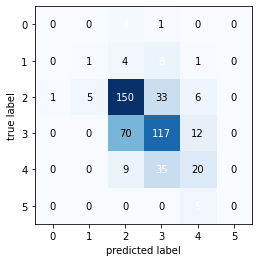

In [ ]:
# Realiza o plot da matriz de confusão
matriz_confusao = confusion_matrix(y_test, y_pred)
from mlxtend.plotting import plot_confusion_matrix

fig, ax = plot_confusion_matrix(conf_mat=matriz_confusao)
plt.show()

In [ ]:
print('Neste modelo obtivemos uma porcentagem de acertos de {:.2f}%'.format(100 * float(clf_KNN.score(X_test, y_test))))


Neste modelo obtivemos uma porcentagem de acertos de 60.00%


### Árvore de Decisão

In [ ]:
from sklearn.tree import DecisionTreeClassifier # Importa o classificador árvore de decisão
from sklearn import metrics # Importa as métricas para avaliação

In [ ]:
# Cria o objeto de classificação através do 
clf_arvore = DecisionTreeClassifier()

# Realiza o treinamento do classificador
clf_arvore = clf_arvore.fit(X_train,y_train)

# Realiza a previsão de classificaçao 
y_pred = clf_arvore.predict(X_test)

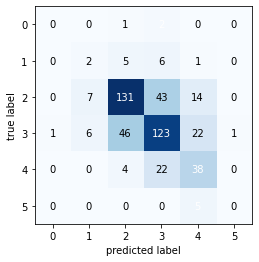

In [ ]:
# Avaliando o modelo 

# Realiza o plot da matriz de confusão
matriz_confusao = confusion_matrix(y_test, y_pred)
from mlxtend.plotting import plot_confusion_matrix

fig, ax = plot_confusion_matrix(conf_mat=matriz_confusao)
plt.show()

In [ ]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[  0   0   1   2   0   0]
 [  0   2   5   6   1   0]
 [  0   7 131  43  14   0]
 [  1   6  46 123  22   1]
 [  0   0   4  22  38   0]
 [  0   0   0   0   5   0]]
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.13      0.14      0.14        14
           5       0.70      0.67      0.69       195
           6       0.63      0.62      0.62       199
           7       0.47      0.59      0.53        64
           8       0.00      0.00      0.00         5

    accuracy                           0.61       480
   macro avg       0.32      0.34      0.33       480
weighted avg       0.61      0.61      0.61       480



In [ ]:
print('Neste modelo obtivemos uma porcentagem de acertos de {:.2f}%'.format(100 * float(clf_arvore.score(X_test, y_test))))

Neste modelo obtivemos uma porcentagem de acertos de 61.25%


### Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

clf_floresta = RandomForestClassifier(max_depth=10, random_state=1)
clf_floresta.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [ ]:
clf_floresta.predict(X_test)

array([5, 6, 5, 7, 5, 5, 6, 5, 7, 5, 6, 6, 5, 5, 6, 6, 5, 6, 5, 5, 5, 6,
       6, 5, 6, 6, 7, 5, 5, 6, 6, 7, 5, 6, 7, 5, 5, 6, 5, 5, 5, 5, 6, 6,
       5, 6, 7, 5, 6, 5, 6, 6, 5, 6, 6, 5, 6, 5, 6, 6, 5, 5, 6, 5, 6, 5,
       6, 6, 6, 6, 5, 5, 6, 5, 6, 5, 6, 5, 5, 6, 6, 6, 7, 5, 5, 5, 7, 5,
       5, 7, 6, 5, 5, 6, 5, 5, 5, 6, 7, 6, 5, 6, 5, 7, 5, 5, 5, 5, 5, 6,
       6, 5, 5, 5, 6, 6, 6, 5, 5, 6, 5, 5, 5, 5, 6, 6, 6, 5, 5, 7, 6, 6,
       5, 6, 5, 5, 5, 5, 6, 5, 5, 6, 6, 5, 6, 7, 5, 6, 7, 5, 7, 5, 6, 7,
       6, 5, 5, 6, 6, 5, 6, 7, 5, 5, 6, 5, 6, 7, 5, 6, 6, 6, 6, 6, 6, 5,
       7, 5, 6, 5, 6, 5, 6, 5, 7, 5, 6, 5, 6, 5, 5, 5, 5, 5, 6, 6, 6, 5,
       5, 5, 6, 5, 5, 5, 7, 6, 5, 5, 5, 6, 5, 5, 6, 5, 7, 6, 5, 5, 6, 6,
       5, 7, 6, 6, 5, 6, 6, 5, 5, 7, 6, 7, 6, 5, 6, 5, 5, 5, 5, 6, 6, 5,
       6, 5, 6, 5, 6, 5, 5, 5, 5, 6, 5, 5, 5, 6, 7, 5, 6, 5, 6, 7, 5, 5,
       6, 5, 5, 5, 5, 7, 5, 6, 5, 6, 6, 5, 6, 6, 6, 5, 5, 6, 5, 6, 6, 6,
       6, 5, 5, 5, 6, 6, 6, 5, 5, 6, 6, 5, 6, 6, 5,

In [ ]:
print('Neste modelo obtivemos uma porcentagem de acertos de {:.2f}%'.format(100 * float(clf_floresta.score(X_test, y_test))))

Neste modelo obtivemos uma porcentagem de acertos de 66.88%


### Support Vector Machine (SVM)

In [ ]:
# Biblioteca necessária para a construção do SVM
from sklearn.svm import SVC

In [ ]:
clf_svm=SVC(gamma='auto',kernel='rbf')

In [ ]:
# Realiza a classificação via SVM
clf_svm.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
# Realiza a previsão de classificaçao 
y_pred = clf_svm.predict(X_test)

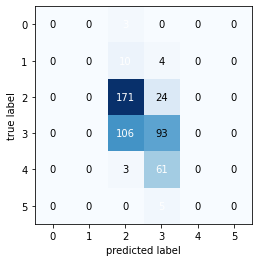

In [ ]:
# Avaliando o modelo 

# Realiza o plot da matriz de confusão
matriz_confusao = confusion_matrix(y_test, y_pred)
from mlxtend.plotting import plot_confusion_matrix

fig, ax = plot_confusion_matrix(conf_mat=matriz_confusao)
plt.show()

In [ ]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[  0   0   3   0   0   0]
 [  0   0  10   4   0   0]
 [  0   0 171  24   0   0]
 [  0   0 106  93   0   0]
 [  0   0   3  61   0   0]
 [  0   0   0   5   0   0]]
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00        14
           5       0.58      0.88      0.70       195
           6       0.50      0.47      0.48       199
           7       0.00      0.00      0.00        64
           8       0.00      0.00      0.00         5

    accuracy                           0.55       480
   macro avg       0.18      0.22      0.20       480
weighted avg       0.44      0.55      0.48       480



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print('Neste modelo obtivemos uma porcentagem de acertos de {:.2f}%'.format(100 * float(clf_svm.score(X_test, y_test))))

Neste modelo obtivemos uma porcentagem de acertos de 55.00%


### Redes Neurais Artificiais

In [ ]:
# Definição da biblioteca
from sklearn.neural_network import MLPClassifier

In [ ]:
clf_mlp = MLPClassifier( alpha=1e-5, hidden_layer_sizes=(5, 5), random_state=1) # Rede com 5 escondidas com 5 neurônios cada 

In [ ]:
X_train.shape

(1119, 11)

In [ ]:
y_train.shape

(1119,)

In [ ]:
# Realiza o fit do modelo
clf_mlp.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(5, 5), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=1, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [ ]:
# Realiza a previsão
y_pred = clf_mlp.predict(X_test)

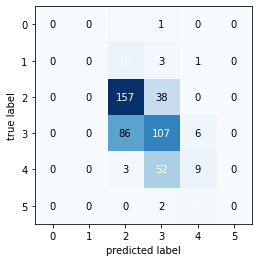

In [ ]:
# Avaliando o modelo 

# Realiza o plot da matriz de confusão
matriz_confusao = confusion_matrix(y_test, y_pred)
from mlxtend.plotting import plot_confusion_matrix

fig, ax = plot_confusion_matrix(conf_mat=matriz_confusao)
plt.show()

In [ ]:
print('Neste modelo obtivemos uma porcentagem de acertos de {:.2f}%'.format(100 * float(clf_mlp.score(X_test, y_test))))

Neste modelo obtivemos uma porcentagem de acertos de 56.88%


## Novo dataset 

**Classificação dos vinhos**

- Nota maior que 5: vinho bom
- Nota menor que ou igual a 5: vinho ruim

In [ ]:
# Aplicando o filtro de qualidade numa nova coluna
df_winequality.loc[df_winequality['quality'] > 5, 'qualidade-vinho'] = 1

In [ ]:
df_winequality.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,qualidade-vinho
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,NaN
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,NaN
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,NaN
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1.0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,NaN


In [ ]:
# Susbtituindo os valores NaN por 0
df_winequality['qualidade-vinho'] = df_winequality['qualidade-vinho'].fillna(0)

In [ ]:
df_winequality.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,qualidade-vinho
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0.0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0.0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0.0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1.0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0.0


In [ ]:
df_winequality.tail(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,qualidade-vinho
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,0.0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1.0
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,0.0
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6,1.0


In [ ]:
# Retirando a coluna "quality" e definindo o novo df
df_wines_padronizado = df_winequality.drop(columns='quality')

In [ ]:
df_wines_padronizado.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,qualidade-vinho
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0.0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0.0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0.0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1.0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0.0


In [ ]:
df_wines_padronizado['qualidade-vinho'].value_counts()

1.0    855
0.0    744
Name: qualidade-vinho, dtype: int64

In [ ]:
# Transforma os dados em array
X2 = df_wines_padronizado.iloc[:, :-1].values  # Dados de entrada
y2 = df_wines_padronizado.iloc[:, 11].values  # Saídas ou target

In [ ]:
# Realiza a divisão dos dados entre treinamento e teste
from sklearn.model_selection import train_test_split   # Função que realiza a divisão do dataset
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.30) # Divide 30% para teste

In [ ]:
# Realiza o processo de normalização dos dados
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()  # Objeto que normaliza os dados
scaler.fit(X_train2)  # Realiza a normalização dos dados

X_train2 = scaler.transform(X_train2)
X_test2 = scaler.transform(X_test2)

In [ ]:
clf_floresta2 = RandomForestClassifier(max_depth=10, random_state=1)
clf_floresta2.fit(X_train2, y_train2)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [ ]:
clf_floresta2.predict(X_test2)

array([1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 0., 0., 1., 1., 0.,
       0., 0., 1., 1., 0., 1., 0., 1., 1., 0., 1., 0., 1., 1., 0., 1., 0.,
       1., 0., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1., 0., 0., 1., 1.,
       0., 0., 0., 1., 1., 1., 0., 0., 1., 1., 1., 0., 1., 0., 0., 1., 0.,
       0., 0., 0., 1., 1., 1., 1., 1., 0., 0., 1., 1., 0., 1., 1., 0., 1.,
       0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 1., 0., 1., 1., 0., 1., 0., 0., 0., 1., 0., 0., 1., 1., 0., 0.,
       1., 1., 0., 0., 1., 0., 1., 1., 0., 1., 0., 1., 0., 0., 0., 1., 0.,
       1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 0., 1., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 0.,
       1., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 1., 1., 0., 1., 0.,
       1., 1., 0., 1., 0., 1., 0., 1., 0., 1., 1., 1., 1., 0., 0., 1., 1.,
       1., 1., 1., 0., 1., 1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 1.,
       1., 0., 1., 1., 1.

In [ ]:
print('Neste modelo obtivemos uma porcentagem de acertos de {:.2f}%'.format(100 * float(clf_floresta2.score(X_test2, y_test2))))

Neste modelo obtivemos uma porcentagem de acertos de 82.08%
